In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from pandas import read_csv
import seaborn as sn

In [2]:
candidates = read_csv('Data/toi-catalog.csv', comment='#')
known = read_csv('Data/Cross_Ref.csv',comment='#')

In [3]:
candidates.keys()

Index(['Source Pipeline', 'TIC', 'Full TOI ID', 'TOI Disposition',
       'TIC Right Ascension', 'TIC Declination', 'TMag Value',
       'TMag Uncertainty', 'Epoch Value', 'Epoch Error',
       'Orbital Period Value', 'Orbital Period Error',
       'Transit Duration Value', 'Transit Duration Error',
       'Transit Depth Value', 'Transit Depth Error', 'Sectors',
       'Public Comment', 'Surface Gravity Value',
       'Surface Gravity Uncertainty', 'Signal ID', 'Star Radius Value',
       'Star Radius Error', 'Planet Radius Value', 'Planet Radius Error',
       'Planet Equilibrium Temperature (K) Value',
       'Effective Temperature Value', 'Effective Temperature Uncertainty',
       'Effective Stellar Flux Value', 'Signal-to-noise', 'Centroid Offset',
       'TFOP Master', 'TFOP SG1a', 'TFOP SG1b', 'TFOP SG2', 'TFOP SG3',
       'TFOP SG4', 'TFOP SG5', 'Alerted', 'Updated'],
      dtype='object')

In [4]:
tic_id = candidates['TIC']
TOI = candidates['Full TOI ID']
disposition = candidates['TOI Disposition']
Tmag = candidates['TMag Value']
epoch = candidates['Epoch Value']
Period = candidates['Orbital Period Value']
dPeriod = candidates['Orbital Period Error']
Duration = candidates['Transit Duration Value']
Depth = candidates['Transit Depth Value']
R_s = np.array(candidates['Star Radius Value'])
dR_s = np.array(candidates['Star Radius Error'])
R_p = candidates['Planet Radius Value']
dR_p = candidates['Planet Radius Error']
Insolation = candidates['Effective Stellar Flux Value']
T_eq = candidates['Planet Equilibrium Temperature (K) Value']
T_eff = np.array(candidates['Effective Temperature Value'])
#logg = candidates['logg']
RA = candidates['TIC Right Ascension']
Dec = candidates['TIC Declination']
sectors = candidates['Sectors']

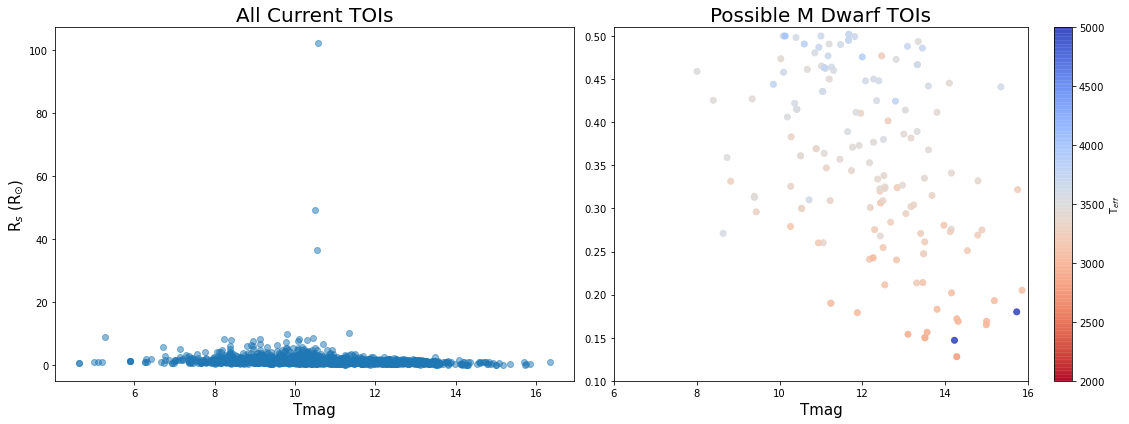

In [5]:
fig, (ax1, ax2) = plt.subplots(figsize=(16,6), nrows=1, ncols=2)
points = plt.scatter(Tmag, R_s, alpha=0.9, c=T_eff, cmap="coolwarm_r", vmin=2000, vmax=5000)

ax1.scatter(Tmag, R_s, alpha=0.5)
ax1.set_ylabel(r'R$_s$ (R$_{\odot}$)', fontsize=15)
ax1.set_xlabel('Tmag',fontsize=15)
ax1.set_title('All Current TOIs',fontsize=20)

fig.colorbar(points, label='T$_{eff}$')
ax2.set_xlabel('Tmag',fontsize=15)
ax2.set_title('Possible M Dwarf TOIs',fontsize=20)
ax2.set_ylim(0.1,0.51)
ax2.set_xlim(6,16)

plt.tight_layout()
plt.savefig('Figs/rs_tmag_plots.pdf')
plt.show()

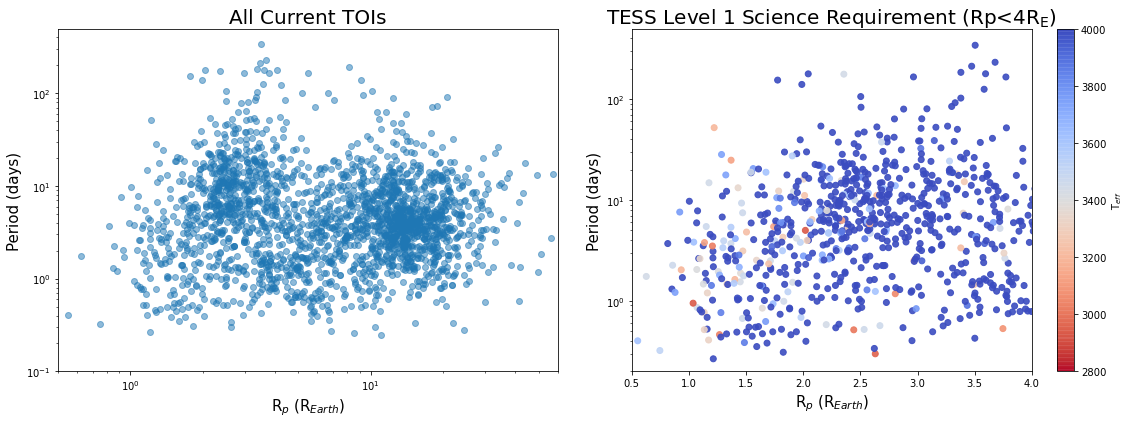

In [6]:
fig, (ax1, ax2) = plt.subplots(figsize=(16,6), nrows=1, ncols=2)
points = plt.scatter(R_p, Period, alpha=0.9, c=T_eff, cmap="coolwarm_r", vmin=2800, vmax=4000)

ax1.scatter(R_p, Period, alpha=0.5)
ax1.set_ylabel('Period (days)', fontsize=15)
ax1.set_xlabel('R$_p$ (R$_{Earth}$)',fontsize=15)
ax1.set_title('All Current TOIs',fontsize=20)
ax1.set_xscale('log')
ax1.set_xlim(5e-1,60)
ax1.set_yscale('log')
ax1.set_ylim(1e-1,)

#ax2.scatter(R_p, Period, alpha=0.5)
fig.colorbar(points, label='T$_{eff}$')
ax2.set_xlabel('R$_p$ (R$_{Earth}$)',fontsize=15)
ax2.set_ylabel('Period (days)', fontsize=15)
ax2.set_title(r'TESS Level 1 Science Requirement (Rp<4R$_{\rm{E}}$)',fontsize=20)
ax2.set_xlim(0.5,4)
ax2.set_yscale('log')
ax2.set_ylim(2e-1,)

plt.tight_layout()
plt.savefig('Figs/rp_period_plots.pdf')
plt.show()

In [7]:
indices = []
for i in range(len(Tmag)):
    if ( ((R_s[i]-dR_s[i]) <= 0.5) and (R_s[i] != R_s[i]) ) or (T_eff[i]<= 4000.0) or (R_s[i] <= 0.5):
        #print('{:.4f} {:.4f} {:.3f} {}'.format(R_s[i], dR_s[i], (R_s[i]-dR_s[i]), T_eff[i]))
        indices.append(i)

In [8]:
tics = tic_id[indices]
tois = TOI[indices]

print("Number of candidates -",len(tois))

Number of candidates - 247


In [9]:
print(tois[220:])

2076    2094.01
2077    2095.01
2078    2096.02
2079    2095.02
2081    2096.01
2105    2119.01
2110    2120.01
2126    2136.01
2132    2142.01
2180    2208.01
2183    2205.01
2212    2221.01
2249    2257.01
2263    2293.01
2265    2291.01
2266    2290.01
2271    2285.01
2273    2283.01
2278    2269.03
2279    2278.01
2283    2274.01
2288    2269.01
2290    2267.01
2291    2266.01
2296    2269.02
2364    2341.01
2374    2331.01
Name: Full TOI ID, dtype: float64


In [10]:
missed = np.array(set(tois).difference(known['TOI']))
print(missed)

{2341.01, 2331.01}


In [12]:
planet = 2374
print(tic_id[planet])
print(TOI[planet])
print(disposition[planet])
print(Period[planet])
print(dPeriod[planet])
print(epoch[planet])
print(Duration[planet])
print(RA[planet])
print(Dec[planet])
print(Tmag[planet])
print(Depth[planet])
print(R_p[planet])
print(dR_p[planet])
print(R_s[planet])
print(dR_s[planet])
print(T_eff[planet])
print(sectors[planet])

168751223
2331.01
PC
4.71519
0.00073
1460.07339
2.0540000000000003
62.671346
-32.992526
13.367
7310.0
4.98372
0.321743
0.57
0.02
3798.0
5
